<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/29_leaf_area_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 22.5 MB/s eta 0:00:00


Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [2]:
import matplotlib.pyplot as plt
import pooch
import rasterio as rio

In [3]:
sentinel2_img = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/nb_l1c_jun2021_composite.tif',
    known_hash='75009eb809785d7751e2c6eca9ab1f888d62906068084d4b6107e8e08746d37c'
)

In [4]:
with rio.open(sentinel2_img) as src:
    blue, red, nir = src.read([1, 3, 7]) / 10000
    evi = 2.5 * (nir - red) / (nir + 6 * red - 7.5 * blue + 1)
    lai = (3.618 * evi - 0.118)

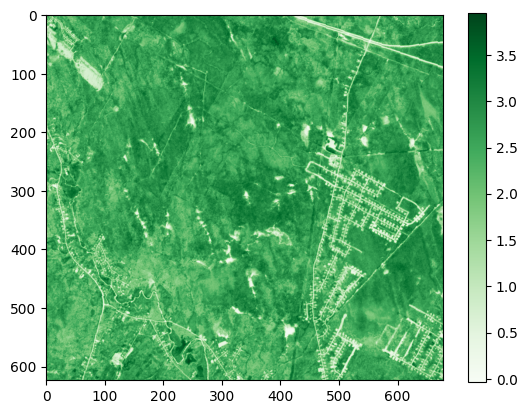

In [5]:
plt.imshow(lai, cmap='Greens')
plt.colorbar()
plt.savefig('LAI.png', dpi=600, bbox_inches='tight');